In [1]:
from learning_agent import robo_scientist
from theories import theory_feynman
from theories import theory_polynomial1D
from theories import theory_polynomial2D
from theories import theory_nested_formulas
from theories import theory_master
from environments import ohm_law, single_param_linear_law, env_1, sin, tg, arcsin, cos, env_2
from data_generator import simple_generator, std_generator
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(context="paper", style="whitegrid", font_scale=2)


In [2]:
feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
working_dirs = {
    theory_feynman.TheoryFeynman: feynman_dir,
}

In [3]:
class Analyser(object):    
    def stats_for_env(self, filename, env_cls, theories_with_params, env_params, iterations_count):
        feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
        working_dirs = {
            theory_feynman.TheoryFeynman: feynman_dir,
        }
        rs = robo_scientist.RoboScientist(working_dirs, keep_full_history=True)
        mses = {}
        for t_with_params in theories_with_params:
            t, t_params = t_with_params[0], t_with_params[1]
            print(t)
            include_derivatives = (t == theory_polynomial1D.TheoryPolynomial1D or
                                   t == theory_polynomial2D.TheoryPolynomial2D)
            env = env_cls(**env_params, include_derivatives=include_derivatives)
            gen = simple_generator.SimpleGenerator
            if t == theory_master.MasterTheory:
                gen = std_generator.STDGenerator
            rs.explore_environment(env, t, simple_generator.SimpleGenerator, 
                                   iterations_count, t_params)
            h = rs.get_history_for_exploration_key(robo_scientist.ExplorationKey(
                env_cls.__name__, t.__name__))
            mses[(t.__name__, str(t_params))] = np.array([a.mse for a in h])
            print(t.__name__, str(t_params))

        colors = ['r', 'g', 'b', 'purple', 'black', 'tan', 'turquoise']
        f = plt.figure(figsize=(18, 8), dpi=100)
        inf = 80
        for i in range(len(mses)):
            m = mses[(theories_with_params[i][0].__name__, str(theories_with_params[i][1]))]
            log_mses = np.where(m > 0, np.log(m), -inf)
            plt.plot(log_mses, c=colors[i],
                     label='{}, params: {}'.format(
                         theories_with_params[i][0].__name__, theories_with_params[i][1]))
        plt.title('Environment: {}, params: {}'.format(env_cls.__name__, env_params))
        plt.xlabel('iterations count (dataset size)')
        plt.ylabel('log MSE')
        plt.legend()
#         plt.tick_params(labelsize=15)
        plt.tight_layout()
        f.savefig(filename, dpi=f.dpi)
        plt.show()

In [4]:
a = Analyser()

<class 'theories.theory_feynman.TheoryFeynman'>
TheoryFeynman {}
<class 'theories.theory_polynomial1D.TheoryPolynomial1D'>
TheoryPolynomial1D {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 4}
<class 'theories.theory_polynomial1D.TheoryPolynomial1D'>
TheoryPolynomial1D {'polynomial_type': 'Fourier', 'polynomial_cnt': 7}
<class 'theories.theory_polynomial1D.TheoryPolynomial1D'>
TheoryPolynomial1D {'polynomial_type': 'Fourier', 'polynomial_cnt': 12}


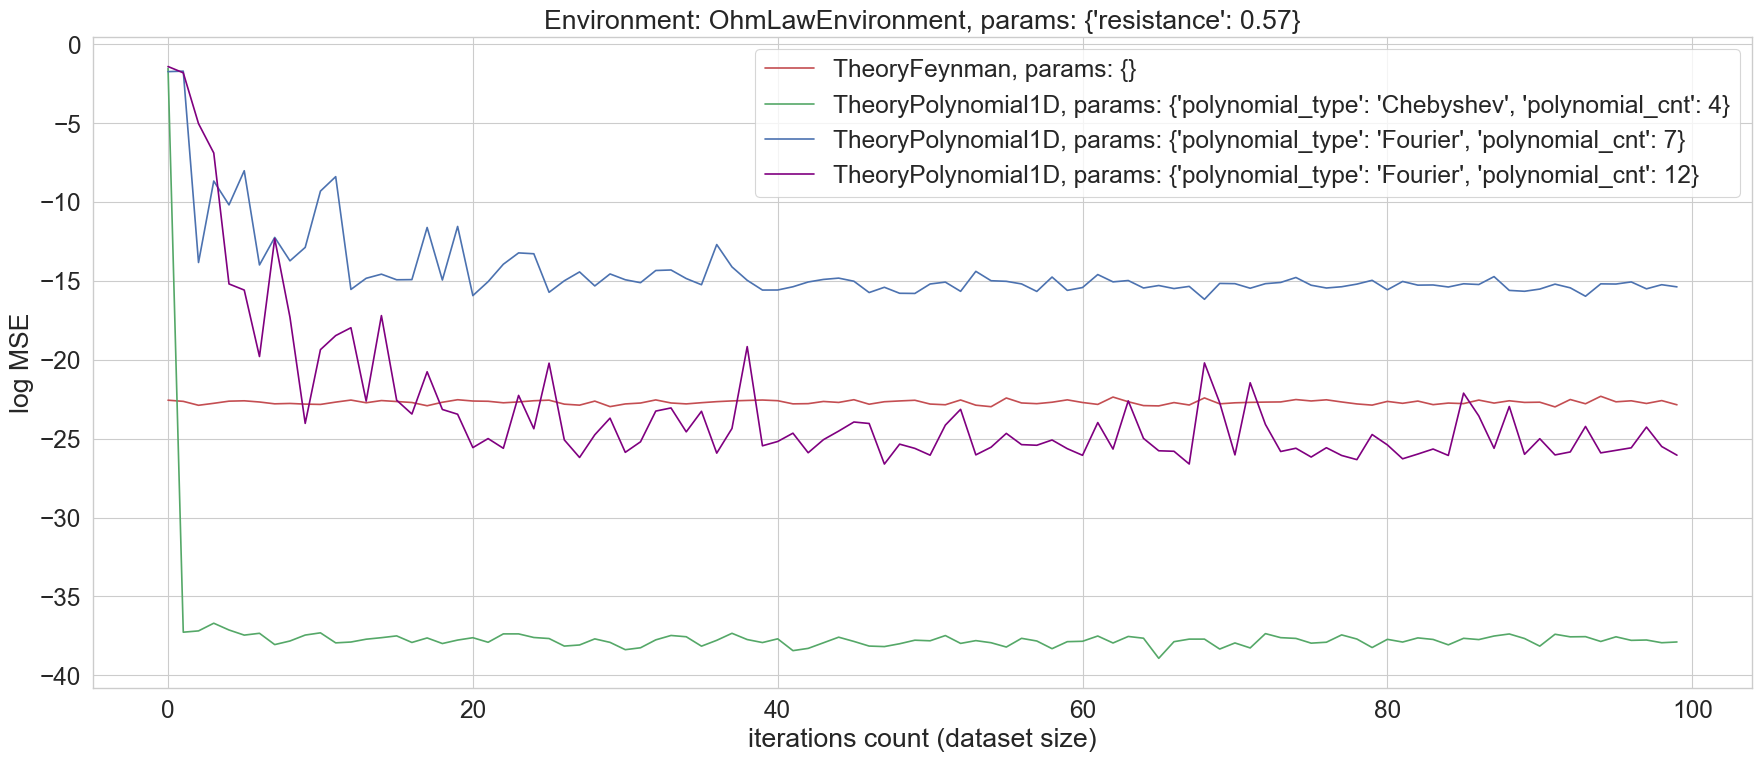

In [5]:
theories = [
    (theory_feynman.TheoryFeynman, {}), 
#     (theory_nested_formulas.TheoryNestedFormula, {}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Fourier', 'polynomial_cnt': 5}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 2}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 3}),
    (theory_polynomial1D.TheoryPolynomial1D, 
     {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 4}),
    (theory_polynomial1D.TheoryPolynomial1D, 
     {'polynomial_type': 'Fourier', 'polynomial_cnt': 7}),
    (theory_polynomial1D.TheoryPolynomial1D, 
     {'polynomial_type': 'Fourier', 'polynomial_cnt': 12}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 6}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 8}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 10}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 20}),
]

a.stats_for_env('f1', ohm_law.OhmLawEnvironment, theories, {'resistance': 0.57}, 100)